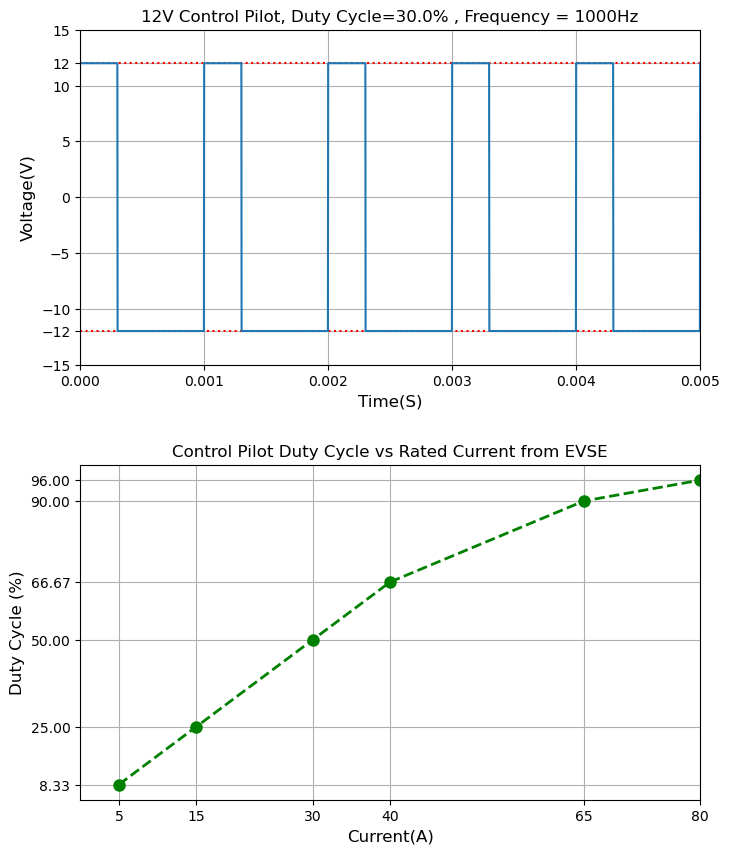

In [96]:
"""
This code plots a square wave, using amplitude, duty cycle amd frequency as input. In this example, the parameters of 
an SAEJ1772 Control Pilot are used.

Importing Numpy for array and math functions
Importing the Signal module from the Numpy Package for the square wave function 
Importing the Pyplot module from the matplotlib package for plotting functions
"""
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
"""
Input Parameters
Duty Cycle as a Ratio
Frequency In Hertz
Amplitude in Voltage
The Sampling Factor i just experimented to get enough samples for a square wave. 
I'm sure there's a formula to tie it to the input frequency, but haven't figured it out yet. 
"""
amplitude_V = 12
dCycle_ratio =0.3 
frequency_Hz = 1000
sampling_factor = 500
t = np.linspace(0, 1, sampling_factor*frequency_Hz, endpoint=False)
"""
Duty Cycle vs Amp calculations
6<I<51
duty cycle=amps/0.6
I>51 
duty cycle=(amps/2.5)+64
"""
I_rated=np.array([5,15,30,40,65,80])
dutyCycle_calc = np.zeros(len(I_rated))
for index,rating in enumerate(I_rated):
    if rating<51:
        dutyCycle_calc[index]=rating/0.6
    else:
        dutyCycle_calc[index]=64+(rating/2.5)
                
"""
Using the Objected Oriented Methods of Matplotlib for plotting
Subpplot 1 : Square Wave
"""

fig, ax = plt.subplots(2,1,figsize=(8, 10), sharex=False) #constrained_layout=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax[0].grid()
ax[0].axhline(y=12, color = 'red',linestyle=':')
ax[0].axhline(y=-12, color = 'red',linestyle=':')
ax[0].plot(t,amplitude_V*signal.square(2*np.pi*frequency_Hz*t,duty=dCycle_ratio))
ax[0].set_xlim(0,0.005)
ax[0].set_xlabel('Time(S)',fontsize=12)
ax[0].set_ylabel('Voltage(V)',fontsize=12)
ax[0].set_ylim(-14,14)
ax[0].set_xticks([0,0.001,0.002,0.003,0.004,0.005])
ax[0].set_yticks([-15,-12,-10,-5,0,5,10,12,15])
ax[0].set_title(str(amplitude_V)+'V Control Pilot, Duty Cycle='+ str(dCycle_ratio*100)+'% '+', Frequency = '+str(frequency_Hz)+'Hz' )
 
"""
Using the Objected Oriented Methods of Matplotlib for plotting
Subpplot 2 : Duty Cycle vs Rated current
"""
ax[1].grid()
ax[1].plot(I_rated,dutyCycle_calc,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
ax[1].set_xlabel('Current(A)',fontsize=12)
ax[1].set_ylabel('Duty Cycle (%)',fontsize=12)
ax[1].set_title('Control Pilot Duty Cycle vs Rated Current from EVSE')
ax[1].set_xlim(0,80)
ax[1].set_yticks(dutyCycle_calc)
ax[1].set_xticks(I_rated)